# Flight Price Prediction

## Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here we have prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

**Dataset**

We have training and test file sepratelly available with us. training set has 10683 rows and 11 colunms including Target feature. Test set has 2671 rows and 10 colmns. All the columns are categorical except target columns. so we have to process all the columns and convert them into numeric one for the model.

Size of training set: 10683 records

Size of test set: 2671 records

## Features

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket


## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [2]:
fl_train_df = pd.read_excel("Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
fl_test_df  = pd.read_excel("Flight_Ticket_Participant_Datasets/Test_set.xlsx")

We have two datasets. One is train data which has price as target column and another is test data where we have to predict the target.

In [3]:
fl_train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
fl_train_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
fl_test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
fl_test_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [7]:
fl_train_df.shape

(10683, 11)

The train data has 10683 rows and 11 columns out of which price is the target column.

In [8]:
fl_test_df.shape

(2671, 10)

The test data has 2671 rows and 10 columns. We have to predict the target i.e. price for test data.

In [9]:
fl_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All the columns are of object dtype. Only 1 column price is of integer dtypes.

In [10]:
fl_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


All the columns are of object dtypes.

In [11]:
fl_train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is 1 null value in Route and 1 null value in Total_Stops.

<AxesSubplot:>

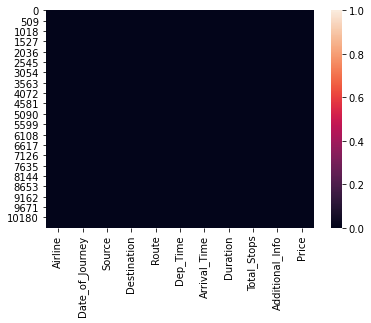

In [12]:
#To check missing values
sns.heatmap(fl_train_df.isnull())

In [13]:
fl_test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

There is no null value in test data.

Since there are only 2 values in total which are null. So we will drop those null values rows as it will not change the dataset much.

In [14]:
fl_train_df.dropna(inplace = True)

In [15]:
fl_train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [16]:
fl_train_df.shape

(10682, 11)

only 1 row is dropped as both the null values are in the same row.

## EDA

**Checking the unique values counts in train data columns and test data columns.**

In [17]:
obj_col = fl_train_df.select_dtypes(include= "object")
for i in obj_col.columns:
    print(i)
    print(obj_col[i].value_counts(),"\n")

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64 

Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019

Conclusion:
    
1. we have multiple airlines data, top 3 airlines names are Jet Airways, IndiGO and air india.
2. Date column has to be converted into datetime columns and date and month from the date needs to be separated for analysin.
3. Major sources of the flights are from major 4 cities i.e. Delhi,Kolkata Bangalore and Mumbai.And their destination is also to major cities i.e. Cochin, Bangalore And Delhi.
4. Route tells whether flight are connecting or direct flight
5. Arrival time columns as multiple observations , it has hours, minutes and months also along wtih dates.
6. Duration is shown in hours and minutes.
7. Totat stops tells that how many stops a flight takes. Most of the flights have 1 stop. Next to it are the flights which are non stop.

### Merging Delhi and New Delhi.

In [18]:
def newd(x):
    if x=='New Delhi':
        return 'Delhi'
    else:
        return x
fl_train_df['Destination'] = fl_train_df['Destination'].apply(newd)

### Creating  features by seprating Date, month and year

Since all the data is from the year 2019 only. SO it is of no use to create year column as all will have same value. So we will only create day and month column from Date column.

**For Train Data**

In [19]:
#Change the datatypes of Date columns from object to datetime type
fl_train_df["Date_of_Journey"] = pd.to_datetime(fl_train_df["Date_of_Journey"])

# Creating day, month and year column
fl_train_df["Dep_Day"]  = fl_train_df["Date_of_Journey"].dt.day
fl_train_df["Dep_Month"]  = fl_train_df["Date_of_Journey"].dt.month

#Droping original Date_of_Journey column as it is of no use now
fl_train_df.drop("Date_of_Journey", axis = 1, inplace = True)

In [20]:
fl_train_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Day,Dep_Month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1


#### For Test Data

In [21]:
#Change the datatypes of Date columns from object to datetime type
fl_test_df["Date_of_Journey"] = pd.to_datetime(fl_test_df["Date_of_Journey"])

# Creating day, month and year column
fl_test_df["Dep_Day"]  = fl_test_df["Date_of_Journey"].dt.day
fl_test_df["Dep_Month"]  = fl_test_df["Date_of_Journey"].dt.month

#Droping original Date_of_Journey column as it is of no use now
fl_test_df.drop("Date_of_Journey", axis = 1, inplace = True)

In [22]:
fl_test_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_Day,Dep_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12


### Creating features by seprating Dep_hour and Dep_min from Departure Time and Arrival Time

**Departure Time**

In [23]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# For Train data 

# Extracting Hours
fl_train_df["Dep_hour"] = pd.to_datetime(fl_train_df["Dep_Time"]).dt.hour

# Extracting Minutes
fl_train_df["Dep_min"] = pd.to_datetime(fl_train_df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
fl_train_df.drop(["Dep_Time"], axis = 1, inplace = True)


#For test data

# Extracting Hours
fl_test_df["Dep_hour"] = pd.to_datetime(fl_test_df["Dep_Time"]).dt.hour

# Extracting Minutes
fl_test_df["Dep_min"] = pd.to_datetime(fl_test_df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
fl_test_df.drop(["Dep_Time"], axis = 1, inplace = True)

fl_test_df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Dep_Day,Dep_Month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,6,20


**Arrival Time**

In [24]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

#For Train Data
# Extracting Hours
fl_train_df["Arrival_hour"] = pd.to_datetime(fl_train_df.Arrival_Time).dt.hour

# Extracting Minutes
fl_train_df["Arrival_min"] = pd.to_datetime(fl_train_df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
fl_train_df.drop(["Arrival_Time"], axis = 1, inplace = True)


#For Test data
# Extracting Hours
fl_test_df["Arrival_hour"] = pd.to_datetime(fl_test_df.Arrival_Time).dt.hour

# Extracting Minutes
fl_test_df["Arrival_min"] = pd.to_datetime(fl_test_df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
fl_test_df.drop(["Arrival_Time"], axis = 1, inplace = True)

fl_test_df.head(2)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20


### Extracting the hours and min from the Duration column

In [25]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time
# Assigning and converting Duration column into list

#Fror Train data
tr_duration = list(fl_train_df["Duration"])
for i in range(len(tr_duration)):
    if len(tr_duration[i].split()) !=2:
        if "h" in tr_duration[i]:
             tr_duration[i] = tr_duration[i].strip() + " 0m" 
        else:
            tr_duration[i] = "0h " + tr_duration[i]
tr_duration_hrs = []
tr_duration_mins = []

for i in range(len(tr_duration)):
    tr_duration_hrs.append(int(tr_duration[i].split("h")[0]))
    tr_duration_mins.append(int(tr_duration[i].split("m")[0].split()[-1]))
    
#For Test Data   
test_duration = list(fl_test_df["Duration"])
for i in range(len(test_duration)):
    if len(test_duration[i].split()) !=2:
        if "h" in test_duration[i]:
             test_duration[i] = test_duration[i].strip() + " 0m" 
        else:
            test_duration[i] = "0h " + test_duration[i]
test_duration_hrs = []
test_duration_mins = []

for i in range(len(test_duration)):
    test_duration_hrs.append(int(test_duration[i].split("h")[0]))
    test_duration_mins.append(int(test_duration[i].split("m")[0].split()[-1]))

In [26]:
# Training data
fl_train_df["Duration_hours"] = tr_duration_hrs
fl_train_df["Duration_Min"] = tr_duration_mins
fl_train_df.drop("Duration",axis = 1,inplace = True)

# test data
fl_test_df["Duration_hours"] = test_duration_hrs
fl_test_df["Duration_Min"] = test_duration_mins
fl_test_df.drop("Duration",axis = 1,inplace = True)

In [27]:
fl_test_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0


In [28]:
fl_train_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25


In [29]:
# Additional_Info contains almost 80% no_info. So we will drop this column
fl_train_df.drop("Additional_Info",axis = 1,inplace = True)
fl_test_df.drop("Additional_Info",axis = 1,inplace = True)

Route and Total_Stops are related to each other. Also some flights are 2 routes, some has 3 or more.So it is difficult to analyse that column. So we will drop Route column also.

In [30]:
# Route and Total_Stops are related to each other. So we will drop this column
fl_train_df.drop("Route",axis = 1,inplace = True)
fl_test_df.drop("Route",axis = 1,inplace = True)

In [31]:
# Replacing Total_Stops
fl_train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
fl_test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [32]:
fl_train_df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25


In [33]:
fl_test_df.head(2)

,Airline,Source,Destination,Total_Stops,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,5,12,6,20,10,20,4,0


In [34]:
fl_train_df["Price"].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Density'>

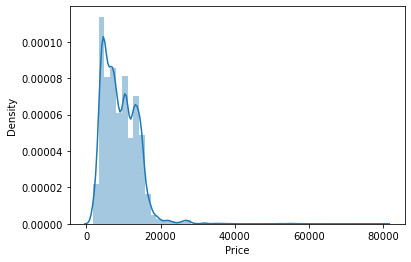

In [35]:
sns.distplot(fl_train_df['Price'])

Price is Right skewed and max price is 79512.

In [36]:
# For numerical columns
fl_train_df.describe()

,Total_Stops,Price,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.824190,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,0.675229,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,1.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,4.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case

**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

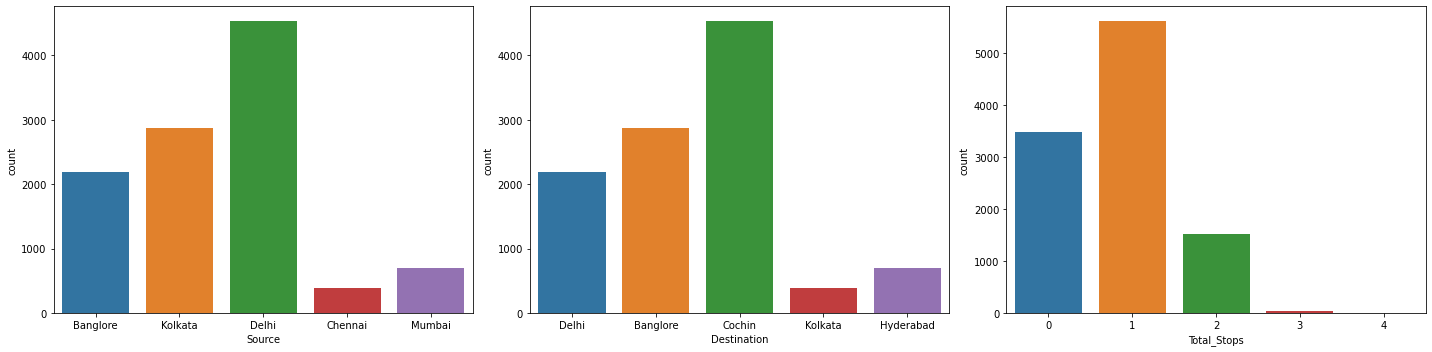

In [37]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot('Source',data=fl_train_df)
plt.subplot(1,3,2)
sns.countplot('Destination',data=fl_train_df)
plt.subplot(1,3,3)
sns.countplot('Total_Stops',data=fl_train_df)
plt.tight_layout()    
plt.show()

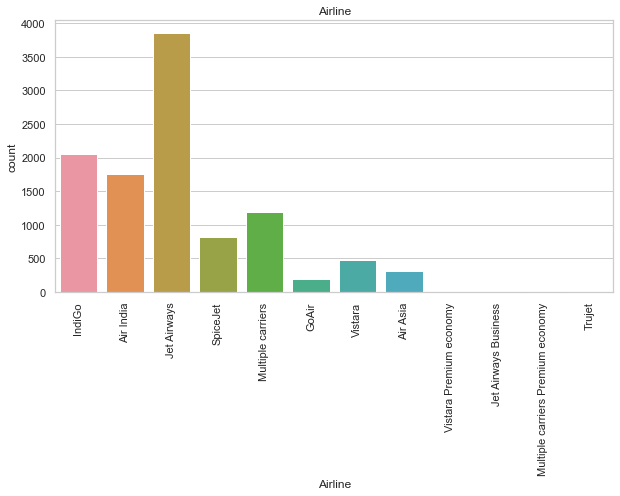

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(fl_train_df.Airline)
plt.title("Airline")
plt.xticks(rotation=90)
plt.show()

Conclusions;
1.	Business class Average price for Jet Airways is way high to Jet Airways business, carriers premium economy, Multiple Carriers. 
2.	Indigo Air India and Multiple carriers economy's price are high after Jet airways business class.
3.	Most of the flight’s source is Delhi followed by Kolkata and maximum flight’s has destination as Cochin followed by Bangalore.
4.	Maximum flights are having 1 stop only followed by zero stops.

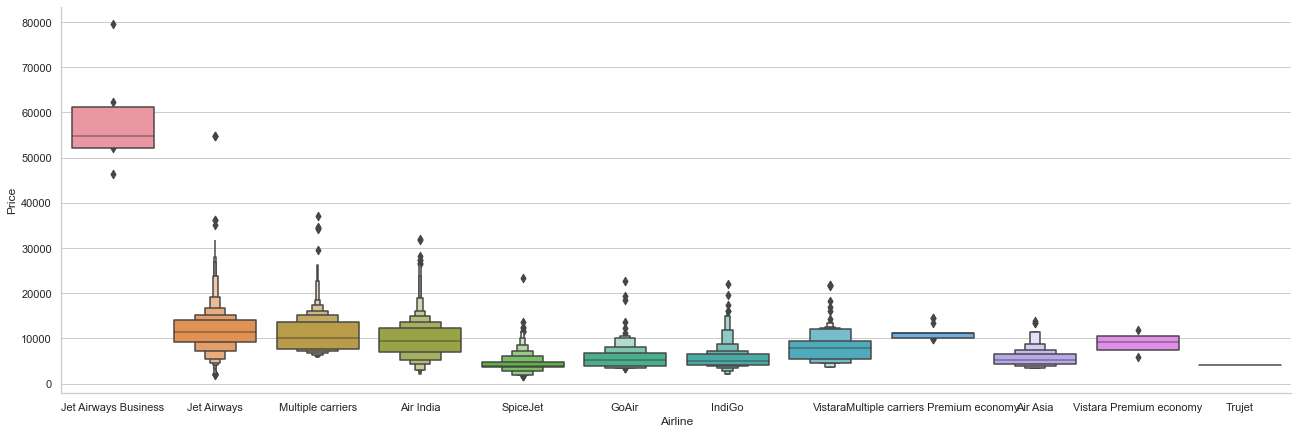

In [39]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = fl_train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

From graph we can see that Jet Airways Business have the highest Price.

Apart from the first Airline almost all are having similar median

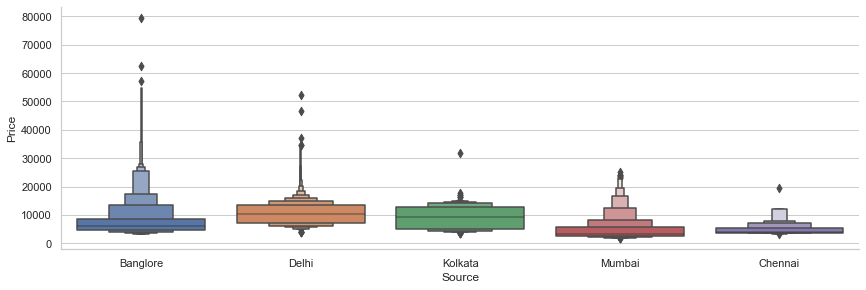

In [40]:
# Source vs Price
sns.catplot(y='Price',x='Source',data=fl_train_df.sort_values('Price', ascending=False),kind='boxen',height=4,aspect=3)
plt.show()

Flights starting from Bangalore are having highest price and flight starting from Chennai are having lowest price.

<AxesSubplot:xlabel='Source,Destination'>

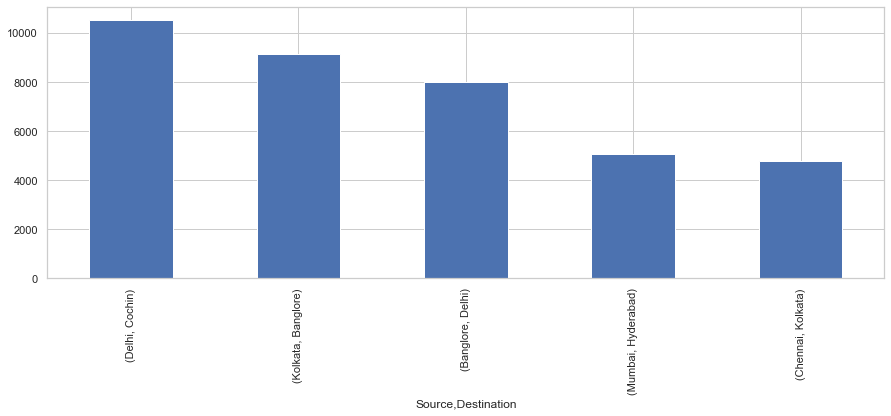

In [41]:
plt.figure(figsize =(15,5))
fl_train_df.groupby(["Source","Destination"])["Price"].mean().sort_values(ascending= False).plot(kind = "bar")

Bangalore to New_Delhi average price is 12000 approx, Delhi to Cochin average price is 10500 approx

<AxesSubplot:xlabel='Dep_Day', ylabel='Price'>

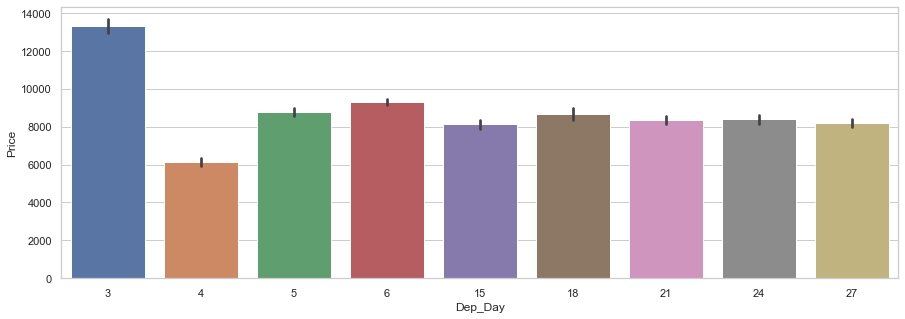

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x = "Dep_Day", y = "Price", data = fl_train_df)

3rd of every month price are extremly high in all the months. This may be because business travels are more at the beginning of the month.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

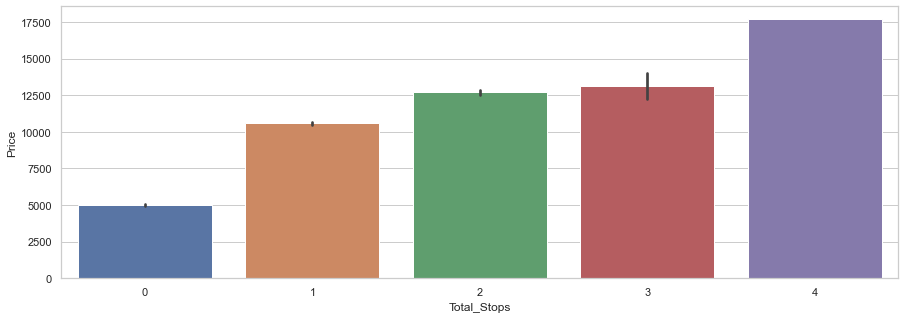

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x = "Total_Stops", y = "Price", data = fl_train_df)

Here we can clearly see that wherever the number of stops are more, price is more.Price is highest for the flights having 4 stops. 

In [44]:
pd.pivot_table(fl_train_df, values = "Price",index =["Source","Destination"], aggfunc="mean", columns = "Dep_Day" )

,Dep_Day,3,4,5,6,15,18,21,24,27
Source,Destination,,,,,,,,,
Banglore,Delhi,14493.081181,5091.176744,4995.629808,5438.763889,6691.165939,8265.032258,5976.827907,5316.600000,4964.392593
Chennai,Kolkata,7252.538462,NaN,4372.522388,4450.476923,5009.358974,4340.307692,3963.027027,4571.736842,4104.136364
Delhi,Cochin,14216.060391,6550.446970,11173.741379,10481.231412,9569.119332,10719.696296,9842.086081,9750.591640,9709.459158
Kolkata,Banglore,5208.716216,7119.089219,10036.759669,9819.789474,8659.063025,8967.514894,9015.367347,10107.777512,4313.253165
Mumbai,Hyderabad,11322.500000,3450.307692,3663.098039,3662.020202,3386.542373,3525.084507,3891.352941,3620.846154,3654.687500


Bangalore to Delhi price is almost same for all days and it is between 5400 to 4964.

Bagalore to New delhi price are high,

3rd of every month price are very high except KOL

In [45]:
pd.pivot_table(fl_train_df, values = "Duration_hours", index = "Airline", columns = "Dep_Day", aggfunc = "count")

Dep_Day,3,4,5,6,15,18,21,24,27
Airline,,,,,,,,,
Air Asia,28.0,26.0,43.0,60.0,33.0,28.0,31.0,37.0,33.0
Air India,302.0,103.0,235.0,324.0,167.0,134.0,178.0,166.0,142.0
GoAir,21.0,22.0,22.0,34.0,23.0,12.0,12.0,28.0,20.0
IndiGo,289.0,160.0,233.0,346.0,218.0,159.0,206.0,204.0,238.0
Jet Airways,416.0,207.0,600.0,885.0,285.0,320.0,405.0,376.0,355.0
Jet Airways Business,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Multiple carriers,173.0,14.0,71.0,307.0,132.0,63.0,138.0,73.0,225.0
Multiple carriers Premium economy,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN
SpiceJet,63.0,80.0,108.0,125.0,87.0,79.0,89.0,100.0,87.0


it is obvious that Jet Airway has maxium flight and its duration also would be high but Air india comes at 3rd place in terms of flight take off count but the average is high as compared to Indigo, which mean it has maximum stops

In [46]:
fl_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  int64 
 4   Price           10682 non-null  int64 
 5   Dep_Day         10682 non-null  int64 
 6   Dep_Month       10682 non-null  int64 
 7   Dep_hour        10682 non-null  int64 
 8   Dep_min         10682 non-null  int64 
 9   Arrival_hour    10682 non-null  int64 
 10  Arrival_min     10682 non-null  int64 
 11  Duration_hours  10682 non-null  int64 
 12  Duration_Min    10682 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.4+ MB


Now we have 3 columns of object dtype and rest are integer dtype.

## Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# training data

fl_train_df["Airline"] = le.fit_transform(fl_train_df["Airline"])
fl_train_df["Source"] = le.fit_transform(fl_train_df["Source"])
fl_train_df["Destination"] = le.fit_transform(fl_train_df["Destination"])

# Test Data

fl_test_df["Airline"] = le.fit_transform(fl_test_df["Airline"])
fl_test_df["Source"] = le.fit_transform(fl_test_df["Source"])
fl_test_df["Destination"] = le.fit_transform(fl_test_df["Destination"])

In [48]:
fl_train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,3,0,2,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,5,1,5,50,13,15,7,25
2,4,2,1,2,13882,6,9,9,25,4,25,19,0
3,3,3,0,1,6218,5,12,18,5,23,30,5,25
4,3,0,2,1,13302,3,1,16,50,21,35,4,45


In [49]:
fl_test_df.head()

,Airline,Source,Destination,Total_Stops,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,4,2,1,1,6,6,17,30,4,25,10,55
1,3,3,0,1,5,12,6,20,10,20,4,0
2,4,2,1,1,21,5,19,15,19,0,23,45
3,6,2,1,1,21,5,8,0,21,0,13,0
4,0,0,2,0,24,6,23,55,2,45,2,50


In [50]:
print('Train data')
print(fl_train_df.info())
print("\n")
print('Test data')
print(fl_test_df.info())

Train data
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Airline         10682 non-null  int32
 1   Source          10682 non-null  int32
 2   Destination     10682 non-null  int32
 3   Total_Stops     10682 non-null  int64
 4   Price           10682 non-null  int64
 5   Dep_Day         10682 non-null  int64
 6   Dep_Month       10682 non-null  int64
 7   Dep_hour        10682 non-null  int64
 8   Dep_min         10682 non-null  int64
 9   Arrival_hour    10682 non-null  int64
 10  Arrival_min     10682 non-null  int64
 11  Duration_hours  10682 non-null  int64
 12  Duration_Min    10682 non-null  int64
dtypes: int32(3), int64(10)
memory usage: 1.3 MB
None


Test data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------        

Now all the columns are int type in both train data and test data. 

In [51]:
fl_train_df.var()

Airline           5.532328e+00
Source            1.385980e+00
Destination       1.026129e+00
Total_Stops       4.559338e-01
Price             2.126638e+07
Dep_Day           7.750689e+01
Dep_Month         8.925907e+00
Dep_hour          3.304893e+01
Dep_min           3.522304e+02
Arrival_hour      4.705023e+01
Arrival_min       2.724747e+02
Duration_hours    7.216359e+01
Duration_Min      2.871607e+02
dtype: float64

Here we can see Dep_day, Dep_month and Duration_hours have little high variance. Let,s check its distribution with scatter plot.

<AxesSubplot:xlabel='Price', ylabel='Dep_Day'>

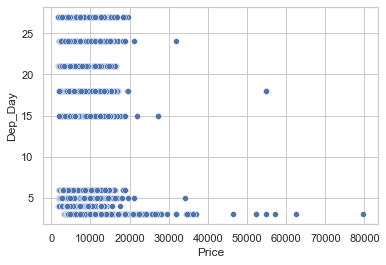

In [52]:
plt.figure(figsize=(6,4))
sns.scatterplot(x ="Price", y = "Dep_Day" , data = fl_train_df)

In the beginning of the month, the price were highest,which was little less at the end of the month.

<AxesSubplot:xlabel='Price', ylabel='Dep_Month'>

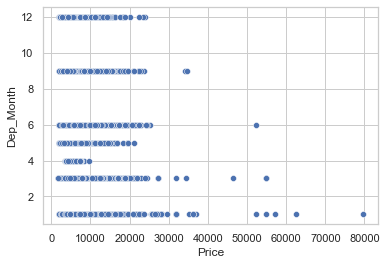

In [53]:
plt.figure(figsize=(6,4))
sns.scatterplot(x ="Price", y = "Dep_Month" , data = fl_train_df)

At the starting months, price were maximum, which decreases by april month and by end of the year it was again high.

<AxesSubplot:xlabel='Price', ylabel='Duration_hours'>

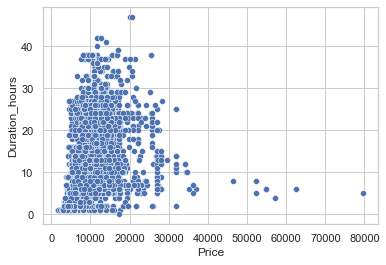

In [54]:
plt.figure(figsize=(6,4))
sns.scatterplot(x ="Price", y = "Duration_hours" , data = fl_train_df)

maximum points are below 20000 and duration is speard across.

## Correlation Map

<AxesSubplot:>

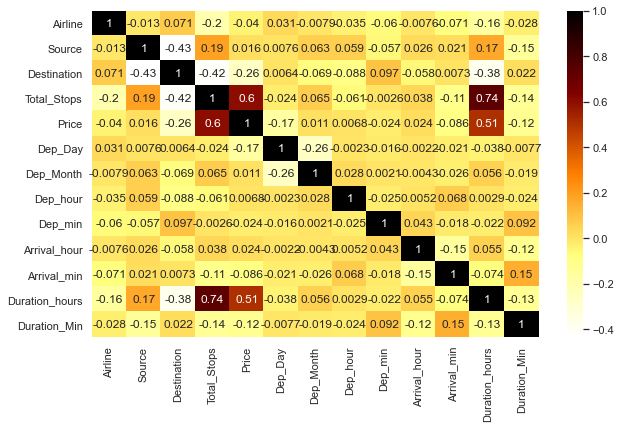

In [55]:
plt.figure(figsize =(10,6))
sns.heatmap(fl_train_df.corr(),annot= True, cmap = "afmhot_r")

Total_stops and Duration_hours have postive correlation with Target colums. Total_stops and Duration hours are also correlation but we will keep the same in the dataset because there are only two which reflect maximum variance

## Check for Skewness

In [56]:
x=fl_train_df.drop('Price', axis=1)
y=fl_train_df['Price']
x

,Airline,Source,Destination,Total_Stops,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,3,0,2,0,24,3,22,20,1,10,2,50
1,1,3,0,2,5,1,5,50,13,15,7,25
2,4,2,1,2,6,9,9,25,4,25,19,0
3,3,3,0,1,5,12,18,5,23,30,5,25
4,3,0,2,1,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4,9,19,55,22,25,2,30
10679,1,3,0,0,27,4,20,45,23,20,2,35
10680,4,0,2,0,27,4,8,20,11,20,3,0
10681,10,0,2,0,3,1,11,30,14,10,2,40


In [57]:
# Cheking Skewness
x.skew().sort_values(ascending=False)

Duration_hours    0.851197
Destination       0.846631
Airline           0.731057
Dep_Month         0.629556
Dep_Day           0.367212
Total_Stops       0.317109
Dep_min           0.167234
Dep_hour          0.112924
Arrival_min       0.110945
Duration_Min     -0.090680
Arrival_hour     -0.370146
Source           -0.424023
dtype: float64

Destination,Duration_hours,Airline has skewness.

In [58]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [59]:
type(x_new)

numpy.ndarray

In [60]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Dep_Day',
       'Dep_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_Min'],
      dtype='object')

In [61]:
x=pd.DataFrame(x_new, columns=x.columns)
x

,Airline,Source,Destination,Total_Stops,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min
0,-0.295676,-1.599652,0.907576,-1.297820,1.179430,-0.819890,1.545888,0.023186,-1.790733,-0.776578,-1.175643,1.200413
1,-1.420475,0.902015,-1.392116,1.574617,-0.823967,-1.885442,-1.356237,1.179354,-0.056006,-0.433010,-0.055254,-0.099976
2,0.147591,-0.012096,0.029552,1.574617,-0.601518,1.138592,-0.548198,0.255935,-1.362584,0.156840,1.074715,-1.877928
3,-0.295676,0.902015,-1.392116,0.358782,-0.823967,1.847402,0.956329,-0.933677,1.413910,0.420855,-0.393117,-0.099976
4,-0.295676,-1.599652,0.907576,0.358782,-1.416260,-1.885442,0.646652,1.179354,1.118899,0.670321,-0.603213,0.955571
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-2.244258,0.902015,-1.392116,-1.297820,-1.089003,1.138592,1.107195,1.334321,1.266349,0.156840,-1.175643,0.178061
10678,-1.420475,0.902015,-1.392116,-1.297820,1.333246,-0.407861,1.255645,1.016696,1.413910,-0.125677,-1.175643,0.445547
10679,0.147591,-1.599652,0.907576,-1.297820,1.333246,-0.407861,-0.738484,0.023186,-0.348125,-0.125677,-0.856175,-1.877928
10680,2.122962,-1.599652,0.907576,-1.297820,-1.416260,-1.885442,-0.185064,0.467472,0.090331,-0.776578,-1.175643,0.704280


In [62]:
# Again Cheking Skewness if it has been removed 
x.skew().sort_values(ascending=False)

Dep_Day           0.016927
Destination      -0.013141
Airline          -0.015281
Dep_Month        -0.026460
Duration_hours   -0.029588
Total_Stops      -0.059185
Dep_hour         -0.104258
Source           -0.238295
Arrival_min      -0.347628
Arrival_hour     -0.356878
Dep_min          -0.359497
Duration_Min     -0.375848
dtype: float64

In [63]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness is removed.

## Checking Outliers

Airline              AxesSubplot(0.125,0.657941;0.168478x0.222059)
Source            AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Destination       AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Total_Stops       AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Dep_Day              AxesSubplot(0.125,0.391471;0.168478x0.222059)
Dep_Month         AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Dep_hour          AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Dep_min           AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Arrival_hour            AxesSubplot(0.125,0.125;0.168478x0.222059)
Arrival_min          AxesSubplot(0.327174,0.125;0.168478x0.222059)
Duration_hours       AxesSubplot(0.529348,0.125;0.168478x0.222059)
Duration_Min         AxesSubplot(0.731522,0.125;0.168478x0.222059)
dtype: object

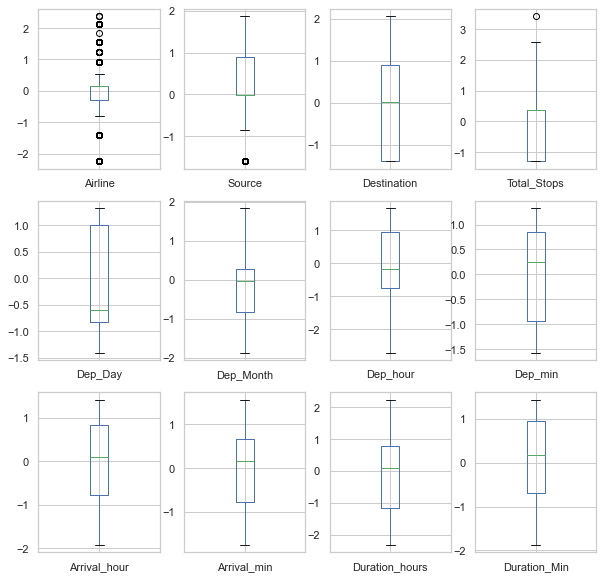

In [64]:
x.plot(kind='box',subplots=True,layout=(3,4),figsize=(10,10))

There are no outliers.

### Feature Scalling

In [65]:
# Performing Standard scaler
sc = StandardScaler()
X = sc.fit_transform(x)
fl_test = sc.fit_transform(fl_test_df)

In [66]:
X

array([[-0.29567552, -1.59965221,  0.90757599, ..., -0.77657798,
        -1.17564313,  1.20041293],
       [-1.4204747 ,  0.90201529, -1.39211617, ..., -0.43301039,
        -0.05525394, -0.09997587],
       [ 0.14759112, -0.01209588,  0.02955217, ...,  0.15684039,
         1.07471547, -1.87792766],
       ...,
       [ 0.14759112, -1.59965221,  0.90757599, ..., -0.12567658,
        -0.85617477, -1.87792766],
       [ 2.12296151, -1.59965221,  0.90757599, ..., -0.77657798,
        -1.17564313,  0.70428035],
       [-1.4204747 , -0.01209588,  0.02955217, ..., -0.43301039,
         0.0853554 , -0.39116479]])

## Finding Best Random State

In [67]:
maxScore = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxScore:
        maxScore=acc
        maxRS=i
print('Best score is',maxScore,'on Random State',maxRS)

Best score is 0.5201357968198729 on Random State 64


## Checking with different algorithms

In [68]:
model = [LinearRegression(),Lasso(alpha=1.0),Ridge(alpha=1.0),DecisionTreeRegressor(criterion='squared_error'),
         KNeighborsRegressor()]
for i in model:
    X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, test_size = 0.3, random_state =maxRS)
    i.fit(X_train1,y_train1)
    pred = i.predict(X_test1)
    print('Train Score of', i , 'is:' , i.score(X_train1,y_train1))
    print("r2_score", r2_score(y_test1, pred))
    print("mean_squred_error", mean_squared_error(y_test1, pred))
    print("RMSE", np.sqrt(mean_squared_error(y_test1, pred)),"\n")

Train Score of LinearRegression() is: 0.44305406894215327
r2_score 0.5201357968198729
mean_squred_error 8907579.355311653
RMSE 2984.556810535134 

Train Score of Lasso() is: 0.4430535327513274
r2_score 0.5201930574066636
mean_squred_error 8906516.443726689
RMSE 2984.3787366429697 

Train Score of Ridge() is: 0.44305405959610955
r2_score 0.5201435091581713
mean_squred_error 8907436.19342345
RMSE 2984.532826662064 

Train Score of DecisionTreeRegressor() is: 0.9749527302581628
r2_score 0.6544972374863609
mean_squred_error 6413467.089593256
RMSE 2532.4823966995814 

Train Score of KNeighborsRegressor() is: 0.788721910802874
r2_score 0.7081944087724568
mean_squred_error 5416702.148143525
RMSE 2327.3809632596735 



Have checked Multiple Model and their score also. I have found that KNeighborsRegressor() is working well on the dataset and have given less RMSE score . Now i will check with ensemble method to boost up score.

## Using Ensemble Technique to boostup score

### RandomForestRegressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=64,criterion='squared_error', min_samples_split=2, min_samples_leaf=1)
#RandomForestClassifier(100)---Default
rf.fit(X_train1,y_train1)
predrf=rf.predict(X_test1)
print('Train Score of', rf , 'is:' , rf.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predrf))
print("mean_squred_error", mean_squared_error(y_test1, predrf))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predrf)))

Train Score of RandomForestRegressor(random_state=64) is: 0.9514090545570778
r2_score 0.7938030086637775
mean_squred_error 3827574.657542148
RMSE 1956.4188348976168


There is much difference between train score and test score. so the model is overfitting.

### AdaBoostRegressor

In [70]:
from sklearn.ensemble import AdaBoostRegressor

ABr=AdaBoostRegressor( base_estimator=None,n_estimators=50,learning_rate=1.0,loss='linear',random_state=64,)
#RandomForestClassifier(50)---Default
ABr.fit(X_train1,y_train1)
predAbr=ABr.predict(X_test1)
print('Train Score of', ABr , 'is:' , ABr.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predAbr))
print("mean_squred_error", mean_squared_error(y_test1, predAbr))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predAbr)))

Train Score of AdaBoostRegressor(random_state=64) is: 0.43776127073842797
r2_score 0.3304557415027817
mean_squred_error 12428554.943112835
RMSE 3525.4155702715157


### GradientBoostingRegressor

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

Gradient_Boost=GradientBoostingRegressor(n_estimators=100,loss='squared_error',learning_rate=0.1,criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1)
#GradientBoostingRegressor(100)---Default
Gradient_Boost.fit(X_train1,y_train1)
predgb=Gradient_Boost.predict(X_test1)
print('Train Score of', Gradient_Boost , 'is:' , Gradient_Boost.score(X_train1,y_train1))
print("r2_score", r2_score(y_test1, predgb))
print("mean_squred_error", mean_squared_error(y_test1, predgb))
print("RMSE", np.sqrt(mean_squared_error(y_test1, predgb)),"\n")

Train Score of GradientBoostingRegressor() is: 0.7843975603819493
r2_score 0.7777511602893274
mean_squred_error 4125540.4408768415
RMSE 2031.142644148077 



**I have found that GradientBoostingRegressor() is working well on the dataset with least train score and test score difference and have given less RMSE score . So i am selecting GradientBoostingRegressor for final Model.**

## Hyper Parameter Tuning

In [72]:
Gradient_Boost = GradientBoostingRegressor()
Para = {"n_estimators":[100,200,300,400],
        "learning_rate":[0.1,0.3,0.5],
        "max_depth" :[3,5,7,9,10]}

Rand_search = RandomizedSearchCV(Gradient_Boost,Para,cv = 5,scoring = "r2",n_jobs =-1,verbose = 2) 
Rand_search.fit(X_train1,y_train1)
print(Rand_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}


In [73]:
prediction = Rand_search.predict(X_test1)

In [83]:
Price = GradientBoostingRegressor(n_estimators= 300, max_depth= 3, learning_rate =0.1)
Price.fit(x_train, y_train)
pred = Price.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))

R2_Score: 80.47710784831041
RMSE value: 2129.4774679993234


### Plotting the residuals.

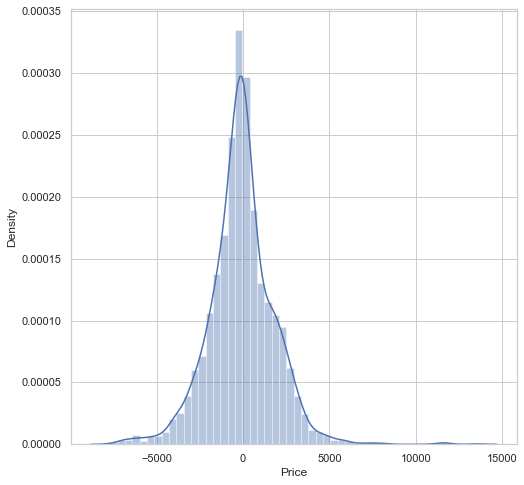

In [84]:
plt.figure(figsize = (8,8))
sns.distplot(y_test1-prediction)
plt.show()

As we can see that most of the residuals are 0, which means our model is generalizing well.

## Cross Validation

In [85]:
best_Gradient_Boost = GradientBoostingRegressor(n_estimators= 300, max_depth = 3, learning_rate = 0.1)

for i in range(2,11):
    cross_score = cross_val_score(best_Gradient_Boost,X,y,cv = i,n_jobs = -1) 
    print(i,"mean",cross_score.mean() ,"and STD" , cross_score.std())

2 mean 0.7919443443221532 and STD 0.0021048920575445496
3 mean 0.8007221795346283 and STD 0.008130786291244701
4 mean 0.8007585590387961 and STD 0.020663281612748816
5 mean 0.8062401337558743 and STD 0.01003259062735334
6 mean 0.8021117810826489 and STD 0.01179268926760376
7 mean 0.8025562393783945 and STD 0.014200839728644683
8 mean 0.804696050848249 and STD 0.0317546057052126
9 mean 0.804138943540766 and STD 0.018808458000540255
10 mean 0.8044644208761669 and STD 0.018457015184725884


In [104]:
# Cross validate of GradientBoostingRegressor using cv=5
from sklearn.model_selection import cross_val_score
score=cross_val_score(best_Gradient_Boost,X,y,cv=5,scoring='r2')
print('Score:', score)
print('Mean Score:', score.mean())
print('Standard Deviation:', score.std())

Score: [0.79355679 0.79784836 0.82207916 0.80919562 0.80972126]
Mean Score: 0.8064802356440313
Standard Deviation: 0.010027249274831028


## Plotting y_test vs predictions.

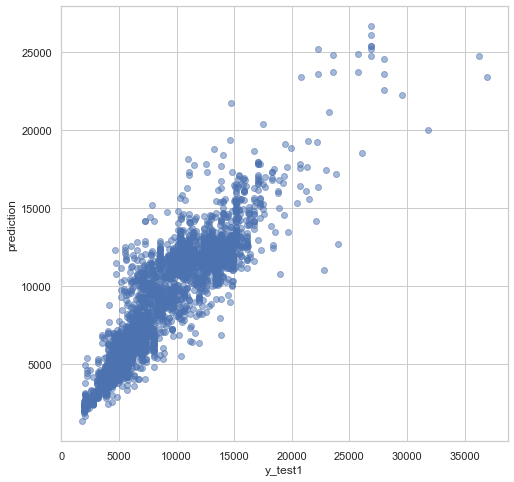

In [100]:
plt.figure(figsize = (8,8))
plt.scatter(y_test1, prediction, alpha = 0.5)
plt.xlabel("y_test1")
plt.ylabel("prediction")
plt.show()

## Saving Model

In [86]:
import pickle
# Saving the GradientBoostRegressor
best_Gradient_Boost.fit(X,y)
pred = best_Gradient_Boost.predict(fl_test)

# Saving model

filename = "Flight_price_prediction.pkl"

with open(filename,"wb") as f:
    pickle.dump(best_Gradient_Boost,f)

In [87]:
loaded_model=pickle.load(open('Flight_price_prediction.pkl','rb'))

In [88]:
Test_pred=loaded_model.predict(fl_test)
Y_tst=pd.DataFrame(data=Test_pred)

Y_tst

,0
0,11690.891014
1,4401.640797
2,12150.095708
3,10218.996811
4,5407.972602
...,...
2666,8240.173394
2667,5552.663290
2668,7677.790216
2669,6781.949676


In [89]:
fl_test_df.shape

(2671, 13)

In [90]:
Y_tst

,0
0,11690.891014
1,4401.640797
2,12150.095708
3,10218.996811
4,5407.972602
...,...
2666,8240.173394
2667,5552.663290
2668,7677.790216
2669,6781.949676


**Combining Test data with target**

In [91]:
fl_test_df['Price']=Y_tst
fl_test_df

,Airline,Source,Destination,Total_Stops,Dep_Day,Dep_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_Min,Price
0,4,2,1,1,6,6,17,30,4,25,10,55,11690.891014
1,3,3,0,1,5,12,6,20,10,20,4,0,4401.640797
2,4,2,1,1,21,5,19,15,19,0,23,45,12150.095708
3,6,2,1,1,21,5,8,0,21,0,13,0,10218.996811
4,0,0,2,0,24,6,23,55,2,45,2,50,5407.972602
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,6,6,20,30,20,25,23,55,8240.173394
2667,3,3,0,0,27,3,14,20,16,55,2,35,5552.663290
2668,4,2,1,1,3,6,21,50,4,25,6,35,7677.790216
2669,1,2,1,1,3,6,4,0,19,15,15,15,6781.949676


# Conclusion

We have training and test file sepratelly available with us. 
All the independent variables are categorical in nature and dependent variable of train data i.e. price is numerical data type. So applied regressoin method for prediction.

Once data has been cleaned for both test and training files, Label encoding applied on them to convert them into Numerical one.I have tried best algorithm and it has given top 5 features, i trained model on them but for most of the models, train and test data was having high variance, The model was overfitting. 

Only GradientBoosting regressor worked well out of all the models, as there was less difference between train score and test score and RMSE was also low.I have it as final model and have done further procesing.